In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from scipy.linalg import norm
from sklearn.datasets import make_moons
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider
from sklearn.datasets import make_biclusters, make_moons
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.decomposition import PCA

In [2]:
from numpy.linalg import svd
# conda install tensorflow
from tensorflow.keras import datasets

C:\Users\cegom\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cegom\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\cegom\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\cegom\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

11493376/11490434 [==============================] - 9s 1us/step


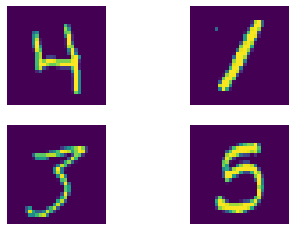

In [3]:
train, test = datasets.mnist.load_data()
xtrain, ytrain = train

np.random.seed(3141)
indices = np.random.choice(np.arange(len(xtrain)), size=4)
fig, ax = plt.subplots(2, 2)
for axi, ix in zip(ax.ravel(), indices):
    axi.imshow(xtrain[ix])
    axi.axis("off")

### Modelo 1

In [52]:
N, M1, M2 = xtrain.shape

In [38]:
xtest, ytest = test

In [12]:
pca = PCA(n_components=0.7)
knn = KNeighborsClassifier(n_neighbors=5)

pipe_1 = Pipeline(
    [("pca", pca),
    ("knn", knn)]
)

In [37]:
%%time
pipe_1.fit(xtrain.reshape(N,-1), ytrain)

Wall time: 9.46 s


Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.7,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [49]:
N2, M1, M2 = xtest.shape

In [50]:
ypred = pipe_1.predict(xtest.reshape(N2,-1))

In [51]:
confusion_matrix(ytest, ypred)

array([[ 971,    1,    1,    0,    0,    1,    5,    1,    0,    0],
       [   0, 1131,    2,    1,    0,    0,    1,    0,    0,    0],
       [   7,    0, 1003,    1,    1,    0,    4,   10,    6,    0],
       [   0,    1,    5,  969,    0,   17,    0,    8,    9,    1],
       [   0,    0,    0,    0,  954,    0,    4,    2,    1,   21],
       [   3,    1,    1,    8,    1,  868,    5,    1,    1,    3],
       [   3,    3,    0,    0,    3,    1,  947,    0,    1,    0],
       [   1,   18,   11,    1,    3,    0,    0,  988,    0,    6],
       [   4,    0,    2,   15,    1,    4,    2,    2,  941,    3],
       [   3,    3,    3,    7,    9,    5,    1,    6,    6,  966]],
      dtype=int64)

### Modelo 2

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

pipe_2 = Pipeline(
    [
    ("knn", knn)]
)

In [62]:
%%time
pipe_2.fit(xtrain.reshape(N,-1), ytrain)

Wall time: 1min 8s


Pipeline(memory=None,
         steps=[('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [63]:
ypred = pipe_2.predict(xtest.reshape(N2,-1))

In [64]:
confusion_matrix(ytest, ypred)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

#### Respuestas:

1. El modelo con todas las variables no parece mejorar de manera significativa el desempeño del modelo

2. Usando componentes principales se pasó de 768 a 26 variables, lo cual bajo el tiempo de entrenamiento en 600%.    
    2.1 Con componentes principales baja significativamente el tiempo de respuesta del modelo.
3. Mucho mucho muchisimo